In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

In [2]:
all_data = pd.read_csv("data/all_data_m.csv")

In [3]:
all_data.iloc[5]

time                2021-01-02
time.1                       6
replies_count_t           16.0
retweets_count_t           7.0
top_tw_t                   1.0
                       ...    
open                  0.007216
high                  0.007349
low                   0.006674
tv                          -5
Volume              60681934.0
Name: 5, Length: 411, dtype: object

In [4]:
all_data["tv"].value_counts()

 0    376
 5    375
-5    330
-2    302
 2    291
 1    283
-1    264
-3    212
 3    150
 4    112
-4    103
Name: tv, dtype: int64

In [5]:
all_data = all_data.iloc[:,2:-1].apply(pd.to_numeric)

In [6]:
X = all_data.drop(columns='tv')
y = all_data['tv']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

y_train = pd.DataFrame(y_train, columns =['tv'])
y_test  = pd.DataFrame(y_test, columns =['tv'])

In [8]:
y_train["tv"].value_counts()

 5    276
 0    271
-5    229
-2    209
 1    200
 2    198
-1    179
-3    141
 3    104
 4     83
-4     68
Name: tv, dtype: int64

<AxesSubplot:xlabel='tv', ylabel='count'>

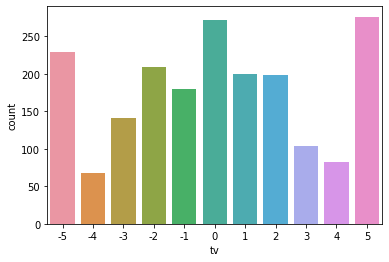

In [16]:
sns.countplot(x=y_train['tv'])

In [10]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_train, y_train)
y.value_counts()

 0    376
 5    375
-5    330
-2    302
 2    291
 1    283
-1    264
-3    212
 3    150
 4    112
-4    103
Name: tv, dtype: int64

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB
nb = CategoricalNB()
rf = RandomForestClassifier()

nb.fit(X_sm, y_sm['tv'])
rf.fit(X_sm, y_sm['tv'])

RandomForestClassifier()

In [12]:
y_train_res_pred_rf = rf.predict(X_sm)
y_test_pred_rf      = rf.predict(X_test)

In [13]:
def model_performance_class(y_train, y_pred_train, y_test, y_pred_test):

    from sklearn.metrics import cohen_kappa_score, classification_report 


    print("Results obtained for the TRAIN SET")
    print("==================================")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_train, y_pred_train)))
    print(classification_report(y_train, y_pred_train))
    print("==================================")
    print("Results obtained for the TEST SET")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_test, y_pred_test)))
    print(classification_report(y_test, y_pred_test))


In [14]:
model_performance_class(y_sm, y_train_res_pred_rf, y_test, y_test_pred_rf)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 1.00
              precision    recall  f1-score   support

          -5       1.00      1.00      1.00       276
          -4       1.00      1.00      1.00       276
          -3       1.00      1.00      1.00       276
          -2       1.00      1.00      1.00       276
          -1       1.00      1.00      1.00       276
           0       1.00      1.00      1.00       276
           1       1.00      1.00      1.00       276
           2       1.00      1.00      1.00       276
           3       1.00      1.00      1.00       276
           4       1.00      1.00      1.00       276
           5       1.00      1.00      1.00       276

    accuracy                           1.00      3036
   macro avg       1.00      1.00      1.00      3036
weighted avg       1.00      1.00      1.00      3036

Results obtained for the TEST SET
The Cohen's Kappa is: 0.06
              precision    recall  f1-score   support

         